In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
# plt.title("Two informative features, one cluster per class", fontsize='small')
# X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
#                              n_clusters_per_class=1, n_samples=200, random_state=2)
# print(np.count_nonzero(Y1 == 1), X1[:3, :], Y1[:3])
# plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
#             s=25, edgecolor='k')

# plt.show()

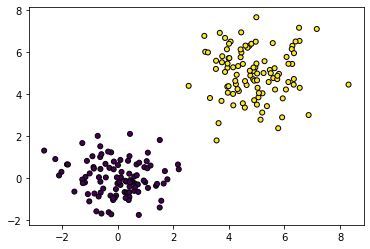

In [9]:
X = np.empty([200,3])
X[:100, 0] = np.random.normal(0,1,100)
X[:100, 1] = np.random.normal(0,1,100)
X[:100, 2] = 0
X[100:, 0] = np.random.normal(5,1,100)
X[100:, 1] = np.random.normal(5,1,100)
X[100:, 2] = 1
plt.scatter(X[:, 0], X[:, 1], marker='o', c=X[:, -1],
            s=25, edgecolor='k')

plt.show()

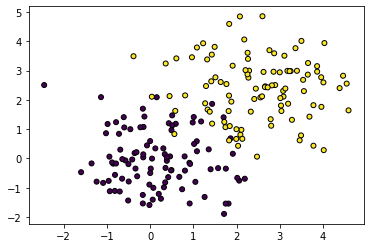

In [10]:
X_new = np.empty([200,3])
X_new[:100, 0] = np.random.normal(0,1,100)
X_new[:100, 1] = np.random.normal(0,1,100)
X_new[:100, 2] = 0
X_new[100:, 0] = np.random.normal(2.25,1,100)
X_new[100:, 1] = np.random.normal(2.25,1,100)
X_new[100:, 2] = 1
plt.scatter(X_new[:, 0], X_new[:, 1], marker='o', c=X_new[:, -1],
            s=25, edgecolor='k')

plt.show()

[[1.33203734 1.28941332]]
[[37  0]
 [ 0 30]]
classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        37
         1.0       1.00      1.00      1.00        30

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



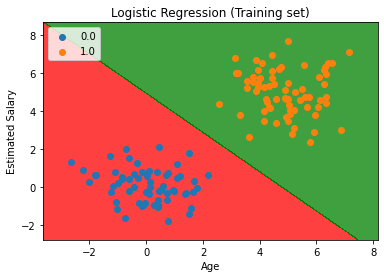

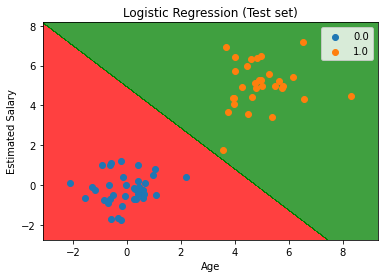

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X[:, :-1], X[:, -1], test_size=1/3)
# print(X_train, Y_train)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)
print(classifier.coef_)
Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print("classification report:")
print(classification_report(Y_test, Y_pred))

# Visualising the Training set results for 1st data set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

[[1.37511375 1.20012735]]
[[34  0]
 [ 0 33]]


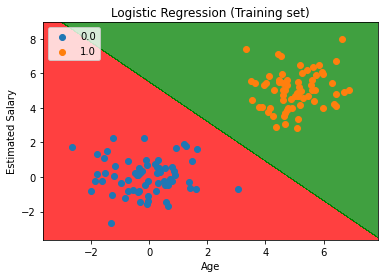

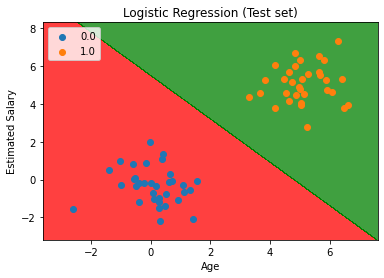

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X[:, :-1], X[:, -1], test_size=1/3, stratify=X[:, -1])
# print(X_train, Y_train)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)
print(classifier.coef_)

Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

# Visualising the Training set results for 1st data set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

[[26  2]
 [ 2 37]]
classification report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        28
         1.0       0.95      0.95      0.95        39

    accuracy                           0.94        67
   macro avg       0.94      0.94      0.94        67
weighted avg       0.94      0.94      0.94        67



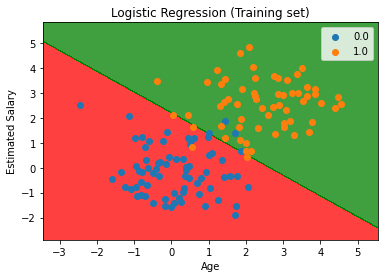

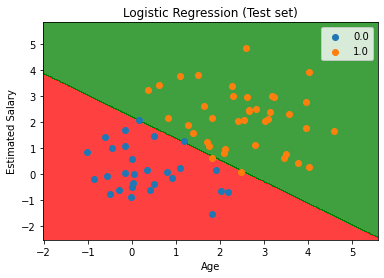

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new[:, :-1], X_new[:, -1], test_size=1/3)
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print("classification report:")
print(classification_report(Y_test, Y_pred))

# Visualising the Training set results for 2nd data set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results for 2nd data set
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

[[ 2.40309127 -0.12753069]]
[[34  0]
 [ 0 33]]
classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        34
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



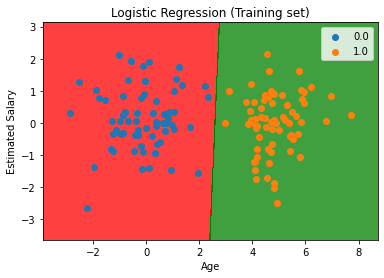

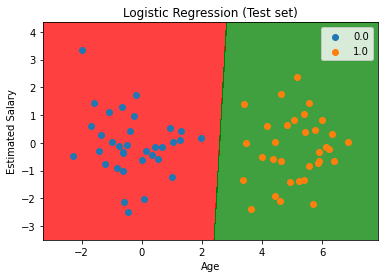

In [31]:
X = np.empty([200,3])
mean_1 = [0,0]
cov = [[1,0],[0,1]]
X[:100, :2] = np.random.default_rng().multivariate_normal(mean_1, cov, 100)
X[:100, 2] = int(0)

mean_2 = [5,0]
cov = [[1,0],[0,1]]
X[100:, :2] = np.random.default_rng().multivariate_normal(mean_2, cov, 100)
X[100:, 2] = int(1)

X_train, X_test, Y_train, Y_test = train_test_split(X[:, :-1], X[:, -1], test_size=1/3)
# print(X_train, Y_train)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)
print(classifier.coef_)
Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print("classification report:")
print(classification_report(Y_test, Y_pred))

# Visualising the Training set results for 1st data set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

[[2.43672709 0.0035701 ]]
[[34  0]
 [ 0 33]]
classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        34
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



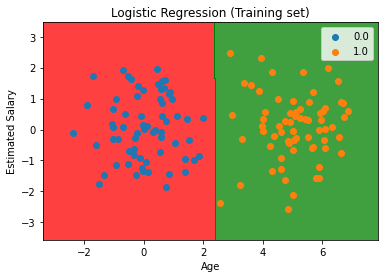

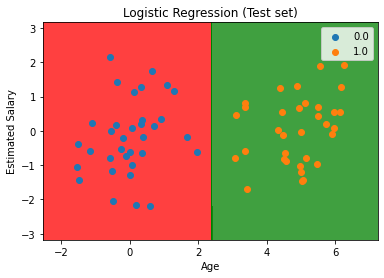

In [33]:
X = np.empty([200,3])
mean_1 = [0,0]
cov = [[1,0],[0,1]]
X[:100, :2] = np.random.default_rng().multivariate_normal(mean_1, cov, 100)
X[:100, 2] = int(0)

mean_2 = [5,0]
cov = [[1,0],[0,1]]
X[100:, :2] = np.random.default_rng().multivariate_normal(mean_2, cov, 100)
X[100:, 2] = int(1)

X_train, X_test, Y_train, Y_test = train_test_split(X[:, :-1], X[:, -1], test_size=1/3, stratify=X[:, -1])
# print(X_train, Y_train)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)
print(classifier.coef_)
Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print("classification report:")
print(classification_report(Y_test, Y_pred))

# Visualising the Training set results for 1st data set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()